#### Introduction

In [2]:
pip install --upgrade tensorflow

     |████████████████████████████████| 320.4MB 50kB/s 
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [5]:
### Import necessary libraries and Data

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline


# Using Tensorflow Keras instead of the original Keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers



plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


In [7]:
import io
churn = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))

In [8]:
# get number of columns and rows in raw data
churn.shape

(10000, 14)

In [9]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [10]:
# check unique values in the attributes
churn.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [11]:
# get summary statistics of data
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"5,000.50","15,690,940.57",650.53,38.92,5.01,"76,485.89",1.53,0.71,0.52,"100,090.24",0.20
std,"2,886.90","71,936.19",96.65,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,510.49",0.40
min,1.00,"15,565,701.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,"2,500.75","15,628,528.25",584.00,32.00,3.00,0.00,1.00,0.00,0.00,"51,002.11",0.00
50%,"5,000.50","15,690,738.00",652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,193.91",0.00
75%,"7,500.25","15,753,233.75",718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00
max,"10,000.00","15,815,690.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


In [12]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
# check for missing values
churn.isnull().all()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [14]:
# view skewness of numerical variables
churn.skew() 

# most of the variables are balanced except "Total_calls_made" and "Average Credit Limit"

RowNumber          0.00
CustomerId         0.00
CreditScore       -0.07
Age                1.01
Tenure             0.01
Balance           -0.14
NumOfProducts      0.75
HasCrCard         -0.90
IsActiveMember    -0.06
EstimatedSalary    0.00
Exited             1.47
dtype: float64

#### Feature Elimination

In [15]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
#drop features that will not impact model
churn_df  = churn.drop(['RowNumber', 'CustomerId', 'Surname'] , axis=1)

In [17]:
# convert the categorical features of Geography and Gender using one-hot code to remove the order

churn_df = pd.get_dummies(churn_df, columns=['Geography', 'Gender'])

In [18]:
churn_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,"101,348.88",1,1,0,0,1,0
1,608,41,1,"83,807.86",1,0,1,"112,542.58",0,0,0,1,1,0
2,502,42,8,"159,660.80",3,1,0,"113,931.57",1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,"93,826.63",0,1,0,0,1,0
4,850,43,2,"125,510.82",1,1,1,"79,084.10",0,0,0,1,1,0


In [19]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


#### Bivariate Analysis

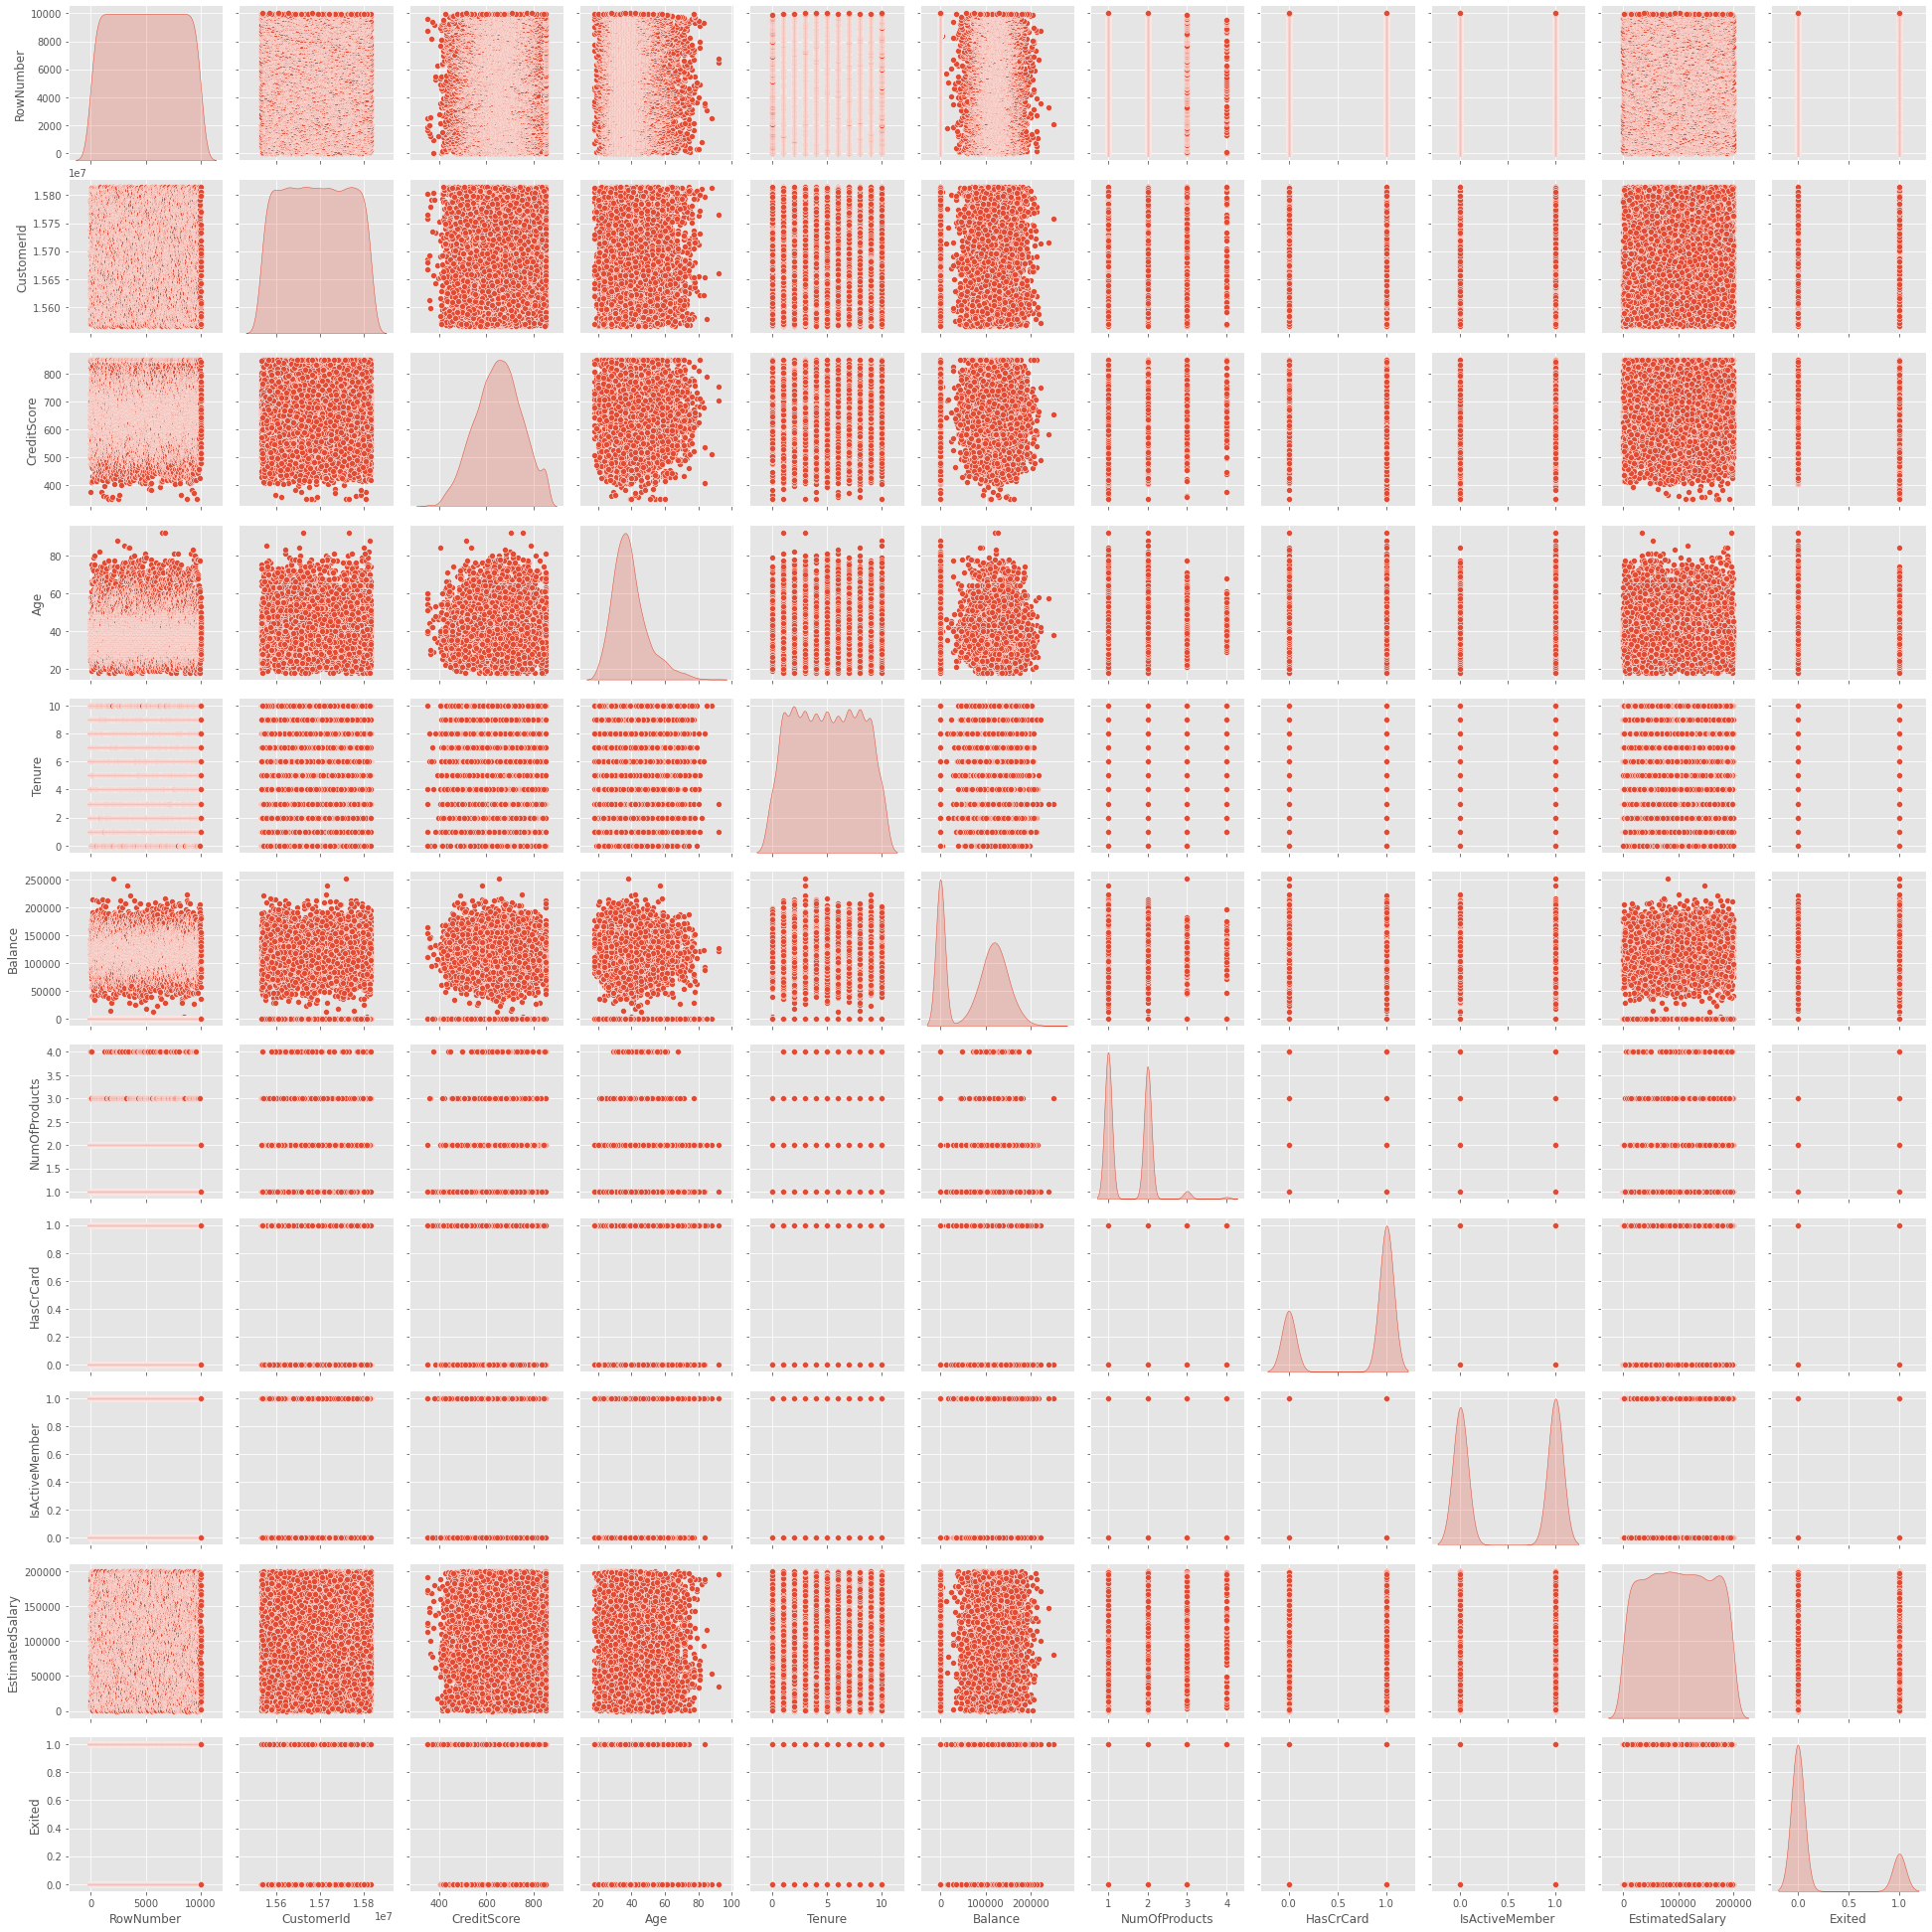

In [20]:
sns.pairplot(churn,diag_kind='kde')

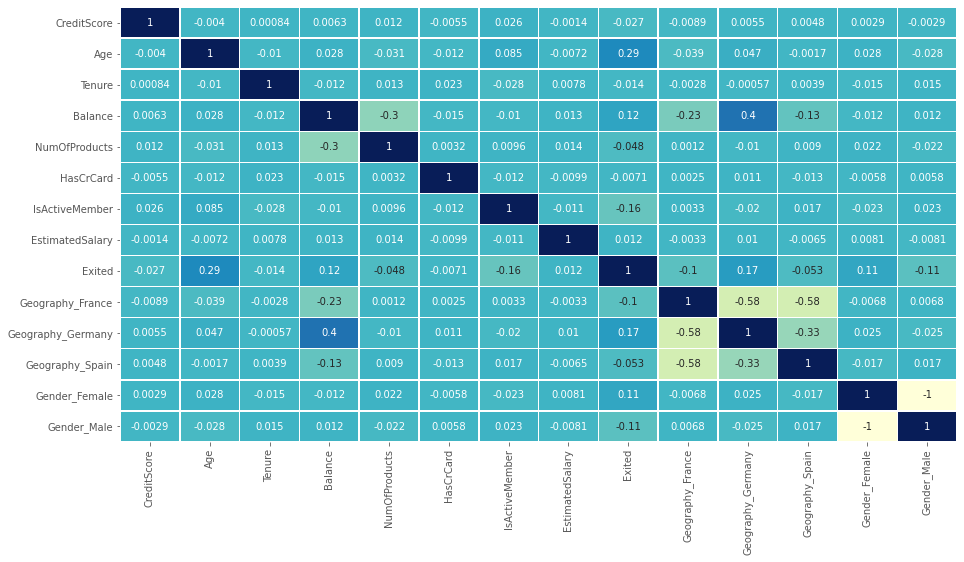

In [21]:
# Both positive and negative correlation exist amongst the variables
plt.figure(figsize=(15,8))

sns.heatmap(churn_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

#### Data Split

In [22]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X=churn_df.drop('Exited', axis=1)

# Specify the target labels and flatten array
y= churn_df['Exited']


# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

y_train =  np.array(y_train)
y_test =  np.array(y_test)

#### Normalization

In [23]:
# Use standard scaler to normalise the train and test data
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 13)
(3000, 13)
(7000,)
(3000,)


#### Modelling : Deep Neural Network

In [25]:
# Using Tensorflow Keras instead of the original Keras


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras


#### First Model

In [167]:
#create model with Sequential class
model =  Sequential() # Initialize the constructor

In [168]:
# Define model architecture : Adding layers [layers and activations]

# Add an first hidden layer 
model.add(Dense(100, input_shape = (13,), activation = 'tanh', kernel_initializer='normal'))
# second hidden layer
model.add(Dense(50, activation='tanh', kernel_initializer='normal'))
# Add an output layer with one neuron
model.add(Dense(1,activation='sigmoid'))

In [169]:
### compile model via optimizers and loss functions
sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy']) #using SGD optimizer and binary_crossentropy loss function

In [170]:
# Summary of the model
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 100)               1400      
_________________________________________________________________
dense_58 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 51        
Total params: 6,501
Trainable params: 6,501
Non-trainable params: 0
_________________________________________________________________


In [171]:
# Training the compiled model

model.fit(X_train, y_train, epochs=5, batch_size=1500, verbose=1) 

Epoch 1/5
5/5 [==============================] - 0s 5ms/step - loss: 0.6896 - accuracy: 0.5306
Epoch 2/5
5/5 [==============================] - 0s 6ms/step - loss: 0.6744 - accuracy: 0.6296
Epoch 3/5
5/5 [==============================] - 0s 4ms/step - loss: 0.6604 - accuracy: 0.6957
Epoch 4/5
5/5 [==============================] - 0s 5ms/step - loss: 0.6474 - accuracy: 0.7446
Epoch 5/5
5/5 [==============================] - 0s 5ms/step - loss: 0.6354 - accuracy: 0.7756


### Second Model

In [172]:
#create model with Sequential class
model_im =  Sequential() # Initialize the constructor

In [173]:
# Define model architecture : Adding layers [layers and activations]
# Add an first hidden layer 
model_im.add(Dense(64, input_shape = (13,), activation = 'relu', kernel_initializer='normal'))
# second hidden layer
model_im.add(Dense(32, activation='relu', kernel_initializer='normal'))
# Add an output layer with one neuron
model_im.add(Dense(1,activation='sigmoid'))

In [174]:
### compile model via optimizers and loss functions

opt = keras.optimizers.Adam(learning_rate=0.01)
model_im.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy']) #using adam optimizer and categorical_crossentropy loss function

In [175]:
# Summary of the model
model_im.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_61 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [176]:
# Training the compiled model

model_im.fit(X_train, y_train, epochs=10, batch_size=1000, verbose=1) 

Epoch 1/10
7/7 [==============================] - 0s 4ms/step - loss: 2.4744e-08 - accuracy: 0.5397
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 2.4744e-08 - accuracy: 0.5397
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 2.4744e-08 - accuracy: 0.5397
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 2.4744e-08 - accuracy: 0.5397
Epoch 5/10
7/7 [==============================] - 0s 5ms/step - loss: 2.4744e-08 - accuracy: 0.5397
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 2.4744e-08 - accuracy: 0.5397
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 2.4744e-08 - accuracy: 0.5397
Epoch 8/10
7/7 [==============================] - 0s 4ms/step - loss: 2.4744e-08 - accuracy: 0.5397
Epoch 9/10
7/7 [==============================] - 0s 4ms/step - loss: 2.4744e-08 - accuracy: 0.5397
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 2.4744e-08 - accuracy: 0.5397

#### Differences between First and Second Models
- Input and Hidden Layers Activation Function: Tanh vs ReLU
- Type of Optimizer : SGD vs ADAM
- Loss Function : Binary vs Categorical_Crossentropy
-  Learning Rate : 0.001 vs 0.01
- Batch Size : 1500 vs 1000
- Epoch : 5 vs 10

#### Prediction at 0.5 Threshold

In [177]:
# Predict model probabilities
y_predict = model.predict(X_test) #first model predict
print(y_predict)

# Predict model classes - Note that the default state threshold of 0.5 is used
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
print(Y_pred_cls)

[[0.48576   ]
 [0.43612844]
 [0.46410927]
 ...
 [0.4067031 ]
 [0.45624346]
 [0.46319497]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [178]:
# Predict model probabilities
y_predict_im = model_im.predict(X_test) #second model predict
print(y_predict_im)

# Predict model classes - Note that the default state threshold of 0.5 is used
Y_pred_cls_im = model_im.predict_classes(X_test, batch_size=200, verbose=0)
print(Y_pred_cls_im)

[[0.50521094]
 [0.48946285]
 [0.5043327 ]
 ...
 [0.4922968 ]
 [0.4947175 ]
 [0.49135897]]
[[1]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


#### Model Performance Evaluation

In [163]:
print(model.metrics_names) # First Model
print(results)

['loss', 'accuracy']
[2.3206075283610517e-08, 0.6816666722297668]


In [164]:
print(model_im.metrics_names) #Second Model
print(results)

['loss', 'accuracy']
[2.3206075283610517e-08, 0.6816666722297668]


In [179]:
# First Model
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_test,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test,Y_pred_cls)))
confusion_matrix(y_test, Y_pred_cls)

94/94 [==============================] - 0s 1ms/step - loss: 0.6274 - accuracy: 0.7943
Accuracy Model1 (Dropout): 0.7943333387374878
Recall_score: 0.0547945205479452
Precision_score: 0.32989690721649484
F-score: 0.09397944199706312


array([[2351,   65],
       [ 552,   32]])

In [180]:
# Second Model
print('Accuracy Model1 (Dropout): '+ str(model_im.evaluate(X_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_test,Y_pred_cls_im)))
print('Precision_score: ' + str(precision_score(y_test, Y_pred_cls_im)))
print('F-score: ' + str(f1_score(y_test,Y_pred_cls_im)))
confusion_matrix(y_test, Y_pred_cls_im)

94/94 [==============================] - 0s 985us/step - loss: 2.3206e-08 - accuracy: 0.5393
Accuracy Model1 (Dropout): 0.5393333435058594
Recall_score: 0.24486301369863014
Precision_score: 0.13191881918819187
F-score: 0.17146282973621105


array([[1475,  941],
       [ 441,  143]])

Using Accuracy as a metric, the first model with a higher accuracy score is better. 
However, from the confusion matrix, the Recall of the second model is higher and better since the task is a classification problem.